## 8  Analysis Previous Installments Payments Dataset

> In this notebook I analyze the `installment payments` dataset which is described below:

> -  Repayment history for the previously disbursed credits in Home Credit related to the loans in the sample. 

#### Analysis Summary:
> After analyzing the `installment payments` dataset I created a category feature called `PAYMENT_GRADE` and a historical on-time payment measure column called `TIMELY_PERCENT`.  The `PAYMENT_GRADE` column puts every installment client into a category based on their on-time historical payment percentage measure by their `TIMELY_PERCENT` column.  Below are the 5 categories for the `PAYMENT_GRADE`:

>> - __Good__: 89% and above
>> - __Par__: 83% to 89%
>> - __Sub_Par__: 71% to 83%
>> - __Poor__: 53% to 71%
>> - __Very_Poor__: Less than 53%

In [1]:
#import helper ultility module
%load_ext autoreload
%aimport utils
%autoreload 1

In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 8.1 Import Datasets And Prepare ABT
> - Import the train and test datasets combined using a utility helper 
> - Create Activity Base Table (ABT) to group the fields by type.

In [3]:
dataset = utils.get_installments_payments()

In [4]:
dataset.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.00,6.00,"-1,180.00","-1,187.00","6,948.36","6,948.36"
1,1330831,151639,0.00,34.00,"-2,156.00","-2,156.00","1,716.53","1,716.53"
2,2085231,193053,2.00,1.00,-63.00,-63.00,"25,425.00","25,425.00"
3,2452527,199697,1.00,3.00,"-2,418.00","-2,426.00","24,350.13","24,350.13"
4,2714724,167756,1.00,2.00,"-1,383.00","-1,366.00","2,165.04","2,160.59"


In [5]:
dataset.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     float64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [6]:
abt = utils.ABT(dataset)

In [7]:
float_table = abt.float_table
print("Total float64 types: {}".format(len(float_table)))
float_table 

Total float64 types: 6


,num,count,na_count,na_%,mean,std,min,25%,50%,75%,max
NUM_INSTALMENT_VERSION,1,"13,605,401.00",0.00,0.00,0.86,1.04,0.00,0.00,1.00,1.00,178.00
NUM_INSTALMENT_NUMBER,2,"13,605,401.00",0.00,0.00,18.87,26.66,1.00,4.00,8.00,19.00,277.00
DAYS_INSTALMENT,3,"13,605,401.00",0.00,0.00,"-1,042.27",800.95,"-2,922.00","-1,654.00",-818.00,-361.00,-1.00
DAYS_ENTRY_PAYMENT,4,"13,602,496.00","2,905.00",0.00,"-1,051.11",800.59,"-4,921.00","-1,662.00",-827.00,-370.00,-1.00
AMT_INSTALMENT,5,"13,605,401.00",0.00,0.00,"17,050.91","50,570.25",0.00,"4,226.09","8,884.08","16,710.21","3,771,487.85"
AMT_PAYMENT,6,"13,602,496.00","2,905.00",0.00,"17,238.22","54,735.78",0.00,"3,398.26","8,125.52","16,108.42","3,771,487.85"


In [8]:
# print description of each field in the integer ABT
field_table = utils.FieldsNames()
field_table.print('installments_payments.csv',float_table.index.values.tolist()) 

1) ['NUM_INSTALMENT_VERSION']: Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
----------------------------------------
2) ['NUM_INSTALMENT_NUMBER']: On which installment we observe payment
----------------------------------------
3) ['DAYS_INSTALMENT']: When the installment of previous credit was supposed to be paid (relative to application date of current loan)
----------------------------------------
4) ['DAYS_ENTRY_PAYMENT']: When was the installments of previous credit paid actually (relative to application date of current loan)
----------------------------------------
5) ['AMT_INSTALMENT']: What was the prescribed installment amount of previous credit on this installment
----------------------------------------
6) ['AMT_PAYMENT']: What the client actually paid on previous credit on this installment
----------------------------------------


### 8.2 Add On Payment Grade Category
> - Create a column called `PAYMENT_GRADE` to put every installment client into a category based on their on-time historical payment percentage.

In [9]:
#add flag to indicate installment received on time and the minimum payment was received
def on_time(x):
    timely = x['DAYS_INSTALMENT'] >= x['DAYS_ENTRY_PAYMENT']
    min_met = x['AMT_PAYMENT'] >= x['AMT_INSTALMENT']
    
    if timely and min_met:
        return 1
    else:
        return 0

dataset['TIMELY_FLAG'] = dataset.apply(on_time,axis=1)

In [10]:
dataset.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TIMELY_FLAG
0,1054186,161674,1.00,6.00,"-1,180.00","-1,187.00","6,948.36","6,948.36",1
1,1330831,151639,0.00,34.00,"-2,156.00","-2,156.00","1,716.53","1,716.53",1
2,2085231,193053,2.00,1.00,-63.00,-63.00,"25,425.00","25,425.00",1
3,2452527,199697,1.00,3.00,"-2,418.00","-2,426.00","24,350.13","24,350.13",1
4,2714724,167756,1.00,2.00,"-1,383.00","-1,366.00","2,165.04","2,160.59",0


In [11]:
#lets count the number of timely payments
dataset['TIMELY_SUM'] = dataset.groupby(['SK_ID_CURR'])['TIMELY_FLAG'].transform('sum')

In [12]:
#lets count the number of total installment payments
dataset['INSTALLMENT_COUNT'] = dataset.groupby(['SK_ID_CURR'])['TIMELY_FLAG'].transform('count')

In [13]:
#flatten dataset to only one row per client
features = ['TIMELY_SUM','INSTALLMENT_COUNT']
dataset_final = dataset.groupby(['SK_ID_CURR'])[features].first().reset_index()

In [14]:
#calculate percent
dataset_final['TIMELY_PERCENT'] = dataset_final['TIMELY_SUM'] / dataset_final['INSTALLMENT_COUNT']
dataset_final['TIMELY_PERCENT'].describe()

count   339,587.00
mean          0.89
std           0.18
min           0.00
25%           0.83
50%           0.97
75%           1.00
max           1.00
Name: TIMELY_PERCENT, dtype: float64

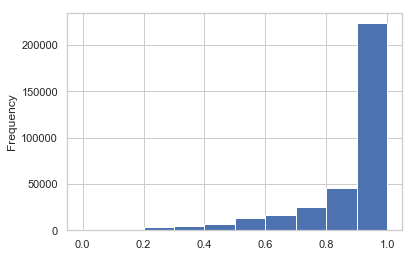

In [15]:
dataset_final['TIMELY_PERCENT'].plot.hist()
plt.show()

In [16]:
def payment_cat(x):
    '''Put each id into a category based timely payments rate.'''
    if x >= 0.89:
        return 'Good'
    elif x >= 0.83:
        return 'Par'
    elif x >= 0.71:
        return 'Sub_Par'
    elif x >= 0.53:
        return 'Poor'
    else:
        return 'Very_Poor'

dataset_final['INSTLL_PAY_PAYMENT_GRADE'] = dataset_final['TIMELY_PERCENT'].apply(payment_cat)

In [17]:
dataset_final.head()

,SK_ID_CURR,TIMELY_SUM,INSTALLMENT_COUNT,TIMELY_PERCENT,INSTLL_PAY_PAYMENT_GRADE
0,100001,6,7,0.86,Par
1,100002,19,19,1.00,Good
2,100003,25,25,1.00,Good
3,100004,3,3,1.00,Good
4,100005,8,9,0.89,Par


In [18]:
dataset_final.groupby(['INSTLL_PAY_PAYMENT_GRADE'])['TIMELY_PERCENT'].describe()

,count,mean,std,min,25%,50%,75%,max
INSTLL_PAY_PAYMENT_GRADE,,,,,,,,
Good,"227,941.00",0.98,0.03,0.89,0.97,1.00,1.00,1.00
Par,"29,238.00",0.86,0.02,0.83,0.85,0.86,0.88,0.89
Poor,"26,772.00",0.63,0.05,0.53,0.59,0.64,0.67,0.71
Sub_Par,"35,243.00",0.77,0.04,0.71,0.74,0.78,0.80,0.83
Very_Poor,"20,393.00",0.37,0.13,0.00,0.29,0.40,0.48,0.53


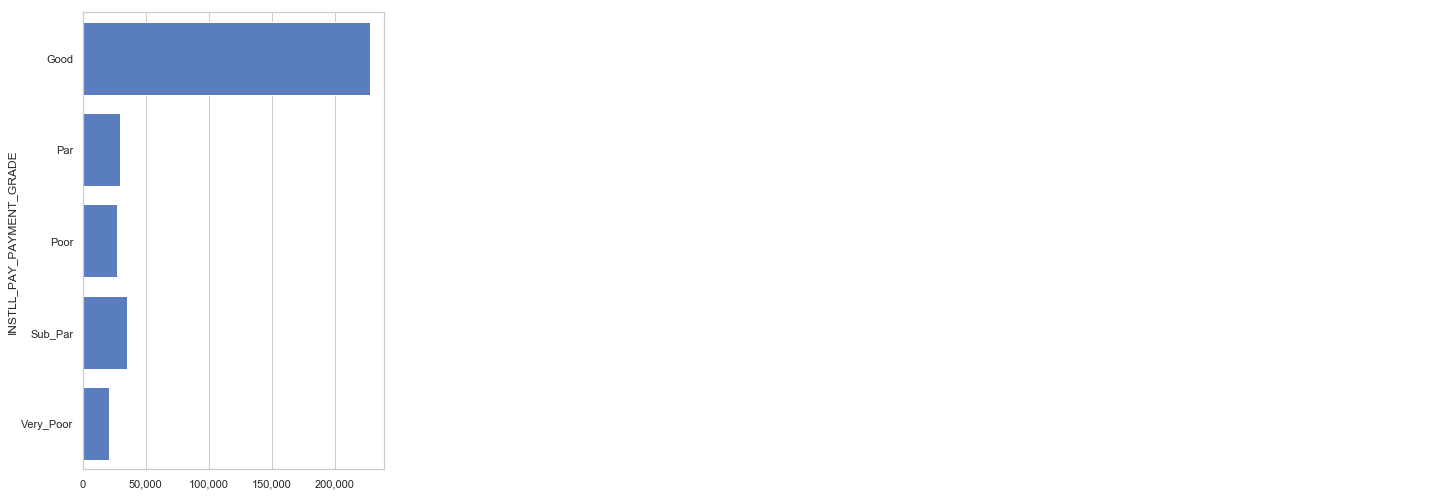

In [19]:
utils.plot_hbar(['INSTLL_PAY_PAYMENT_GRADE'],dataset_final)

### 8.3 Save Final Dataset To File

In [23]:
dataset_final[['SK_ID_CURR','TIMELY_PERCENT', 'INSTLL_PAY_PAYMENT_GRADE']].to_csv('data_pre_processed/1_8_installment_payments.csv',index=False)